In [4]:
import pandas as pd
import numpy as np
import config
from fredapi import Fred

# User will need a FRED API key, can sign up for one here https://fred.stlouisfed.org/docs/api/api_key.html
# replace with your own API key: fred = Fred(api_key='YOUR KEY HERE')
fred = Fred(api_key=config.api_key)

In [5]:
#Function fredget
"""
DEFINE: fredget() => a function to retrieve series, store info, and plot data 
-----------------------INPUTS -------------------------------
varlist: a list of FRED codes ex. FRED_list = ['GDP','SP500']
start_date & end_date: set the chosen sample ex. start_d ='1990-01-01'
plots (Optional): True/False => set whether to show a preview of the data during collection
freq (Optional): default is not to synchronize frequencies: choose 'm','q','a' if aggregating
name_map (Optional):dict containing remapped variable names for plot default titles
------------------------OUTPUTS -----------------------------
df_collect: the compiled data df with date set as index
info_store: DF containing series info (units, titles, notes, etc.)
"""

def fredget(varlist, start_date, end_date, plots=True,freq="",name_map = dict()):
    df_collect = pd.DataFrame()

    for var in varlist:
        df_add = fred.get_series(var, observation_start = start_date, observation_end=end_date, frequency =freq).to_frame(name = var)
        info_add = fred.get_series_info(var).to_frame(name = var)
        print(var)
        #If user changes the 
        if freq != "":
            info_add.loc['cur_freq', var] = freq
            
        if var in name_map:
            info_add.loc['user_title', var] = name_map[var]
        else:
            info_add.loc['user_title', var] = info_add.loc['title', var]
                    
        if plots == True:
            df_add.plot(y=var, use_index=True, kind='line', title = info_add.loc['user_title', var], ylabel = info_add.loc['units', var] )
            
        if df_collect.empty == True:
            df_collect = df_add
            info_store = info_add
        else:
            df_collect = pd.merge(df_collect, df_add, left_index=True, right_index=True, how='outer')
            info_store = pd.merge(info_store, info_add, left_index=True, right_index=True, how='left')
            
    df_collect.sort_index()
    return df_collect, info_store



T10Y2Y
MORTGAGE30US
FEDFUNDS
CPIAUCSL


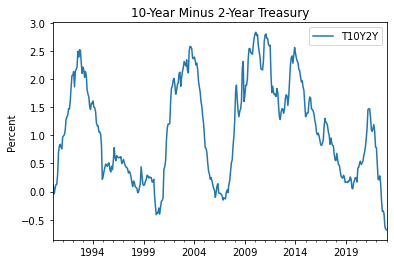

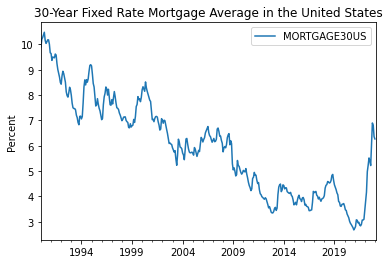

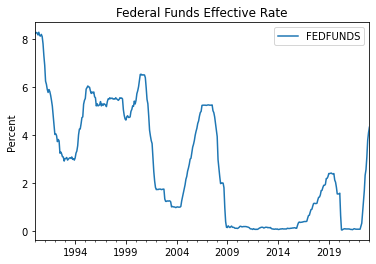

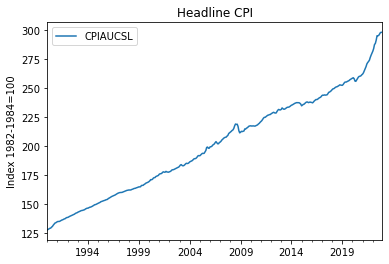

In [6]:
#Example of a function call
start_d ='1990-01-01'
end_d= '2023-02-03'
fq = "m" 
FRED_list = ['T10Y2Y','MORTGAGE30US','FEDFUNDS','CPIAUCSL']
Name_remap = {'T10Y2Y': '10-Year Minus 2-Year Treasury', 'CPIAUCSL': 'Headline CPI'}

df,dfinfo = fredget(FRED_list, start_d, end_d, freq = fq, plots=True, name_map = Name_remap)